   Patient_ID        State_Name  Age  Gender  Diabetes  Hypertension  Obesity  \
0           1         Rajasthan   42  Female         0             0        1   
1           2  Himachal Pradesh   26    Male         0             0        0   
2           3             Assam   78    Male         0             0        1   
3           4            Odisha   58    Male         1             0        1   
4           5         Karnataka   22    Male         0             0        0   

   Smoking  Alcohol_Consumption  Physical_Activity  ...  Diastolic_BP  \
0        1                    0                  0  ...           119   
1        0                    1                  1  ...           115   
2        0                    0                  1  ...           117   
3        0                    0                  1  ...            65   
4        0                    0                  1  ...           109   

   Air_Pollution_Exposure  Family_History  Stress_Level  Healthcare_Access

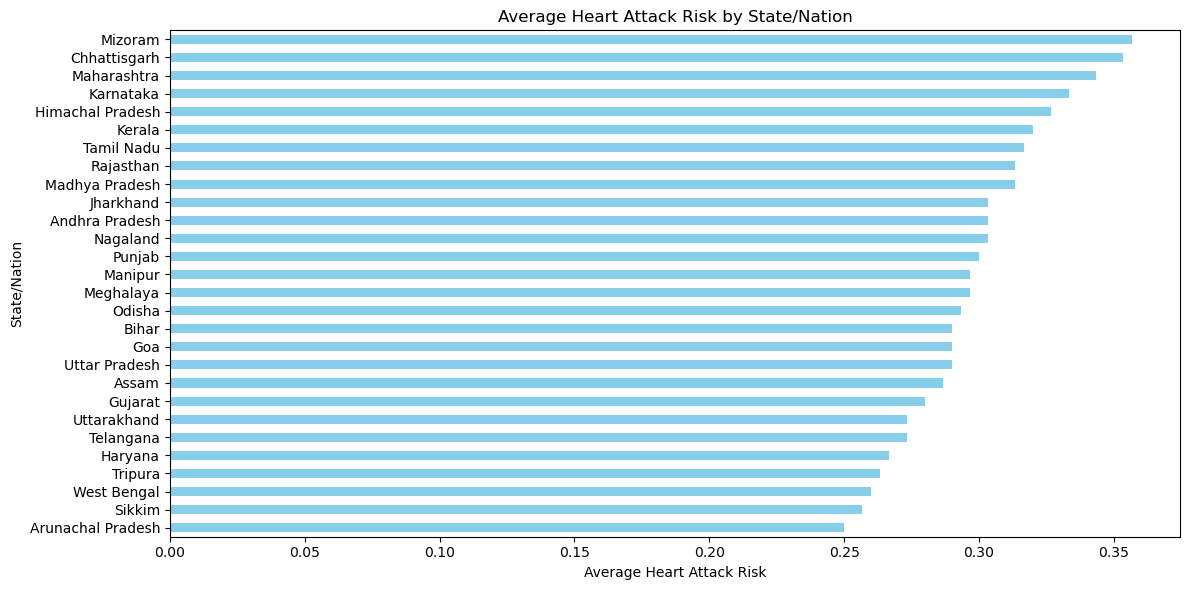

C:\Users\Filippo\AppData\Local\Temp\ipykernel_2756\4212780405.py:85: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_state = sampled_dataset.groupby('State_Name').apply(calc_factor_correlation, factors=risk_factors)


                    Smoking  Alcohol_Consumption  Physical_Activity   Obesity  \
State_Name                                                                      
Andhra Pradesh    -0.098176             0.001468          -0.029425  0.016226   
Arunachal Pradesh  0.013005             0.004186          -0.015713  0.029128   
Assam             -0.084340             0.008852           0.044978 -0.069912   
Bihar             -0.102993             0.015583          -0.003487 -0.010596   
Chhattisgarh       0.071962            -0.060436          -0.039078 -0.027391   

                   Diabetes  Hypertension  Cholesterol_Level  \
State_Name                                                     
Andhra Pradesh    -0.026588     -0.033255          -0.011312   
Arunachal Pradesh -0.098055     -0.089774          -0.026336   
Assam             -0.036948      0.003405          -0.015189   
Bihar             -0.041627     -0.074684          -0.062310   
Chhattisgarh       0.026529      0.104679       

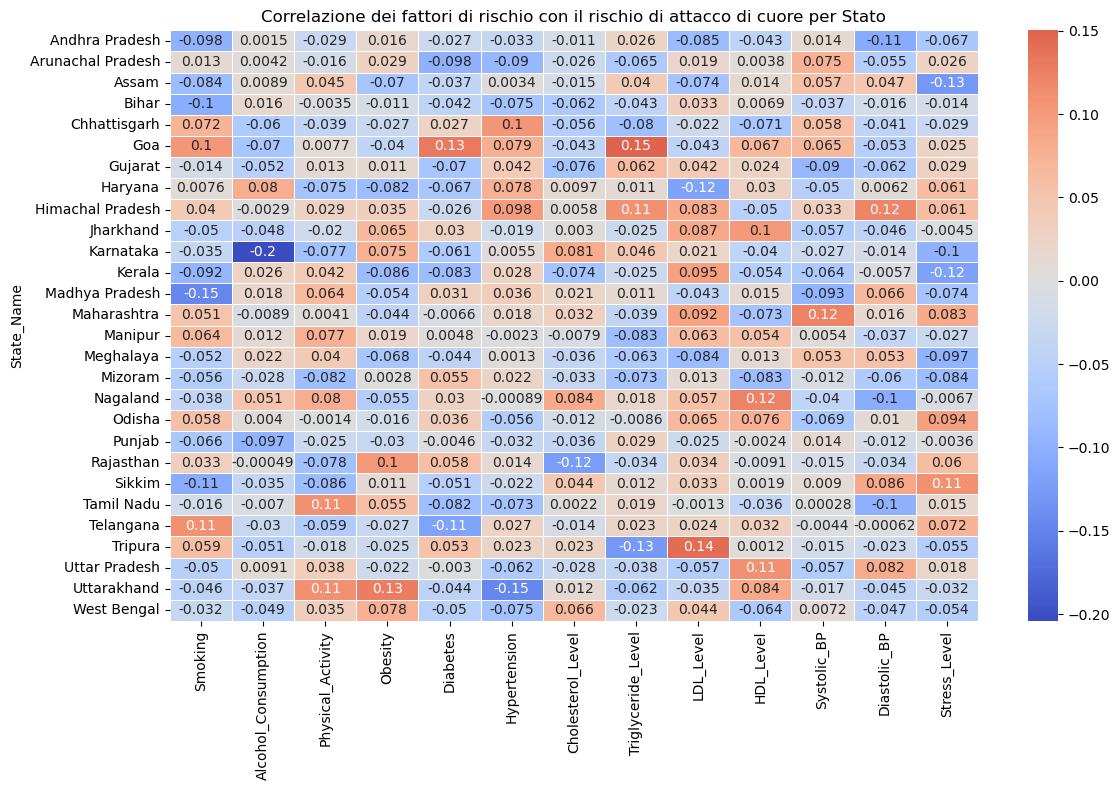

Correlazione di Mizoram con i fattori di rischio: Smoking               -0.056051
Alcohol_Consumption   -0.028173
Physical_Activity     -0.081811
Obesity                0.002817
Diabetes               0.054553
Hypertension           0.021726
Cholesterol_Level     -0.033066
Triglyceride_Level    -0.072663
LDL_Level              0.012709
HDL_Level             -0.083291
Systolic_BP           -0.012179
Diastolic_BP          -0.060480
Stress_Level          -0.083679
Name: Mizoram, dtype: float64
State_Name
Haryana              182.320000
Rajasthan            181.156667
Karnataka            180.320000
Sikkim               179.940000
Kerala               179.160000
Gujarat              179.110000
Mizoram              177.996667
Manipur              177.333333
Jharkhand            176.810000
Maharashtra          176.650000
Tripura              176.060000
Andhra Pradesh       175.803333
Punjab               174.950000
West Bengal          174.863333
Bihar                173.946667
Arunachal Pra

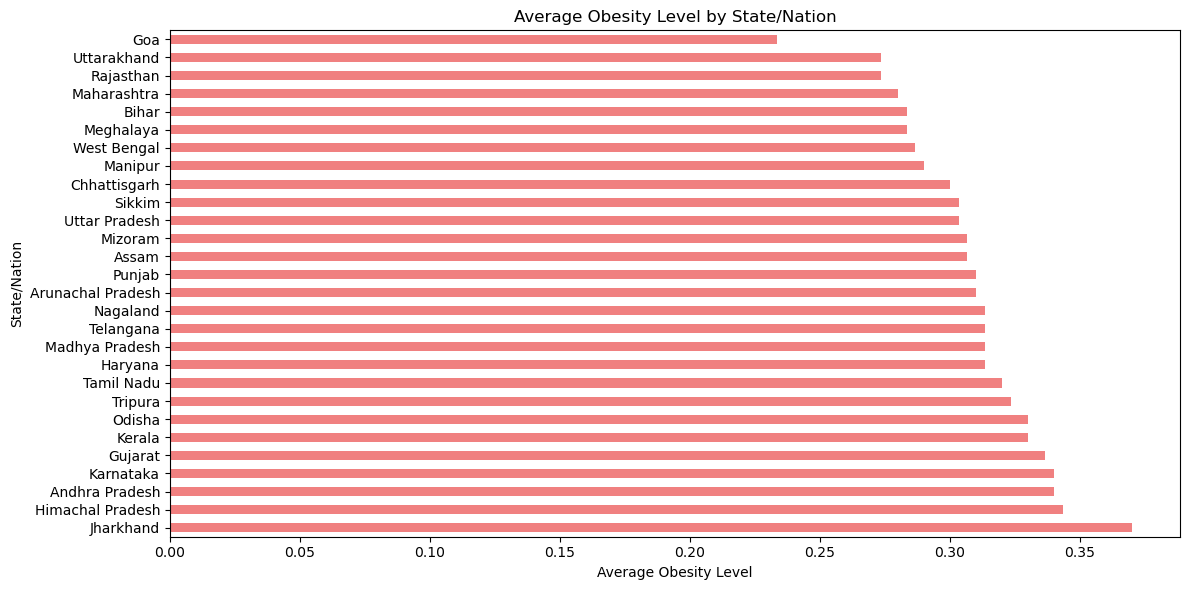

True: Haryana ha il livello medio di trigliceridi più alto
True: Mizoram ha il livello medio di attacchi di cuore più alto
True: Uttarakhand ha il livello medio di stress più alto
Hypertension              0.424367
Physical_Activity         0.276776
Diabetes                  0.234655
Air_Pollution_Exposure    0.224776
Smoking                   0.196718
Stress_Level              0.190156
Healthcare_Access         0.149977
Obesity                   0.112903
Alcohol_Consumption       0.040159
Age                      -0.108302
Name: Mean_Heart_Attack_Risk, dtype: float64


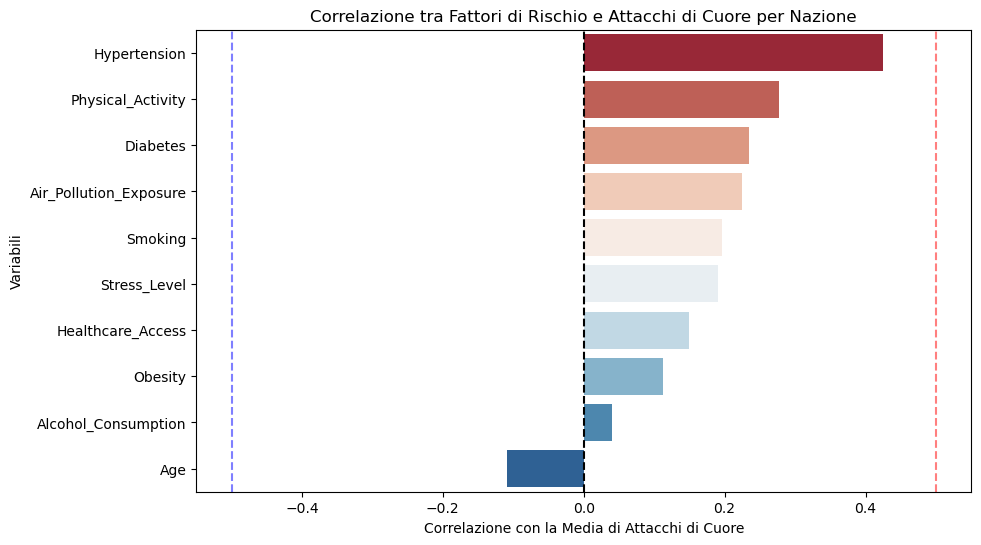

True: Himachal Pradesh ha il livello medio di ipertensione più alto
La nazione con il livello medio più alto di ipertensione è Himachal Pradesh con un valore medio di 0.28


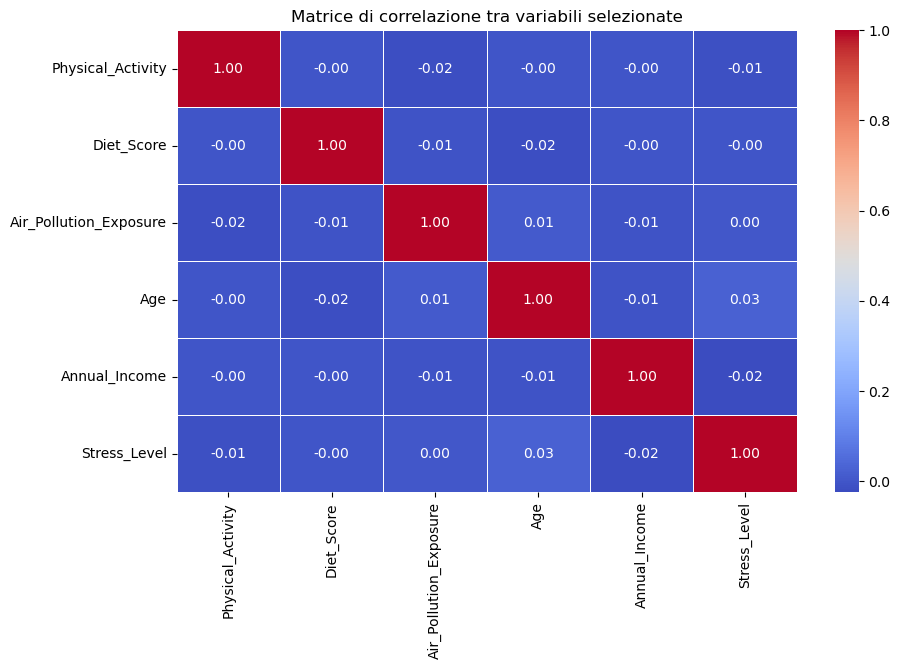

C:\Users\Filippo\AppData\Local\Temp\ipykernel_2756\4212780405.py:308: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State_Name', y='Annual_Income', data=sampled_dataset, showfliers=True, palette="Set2")


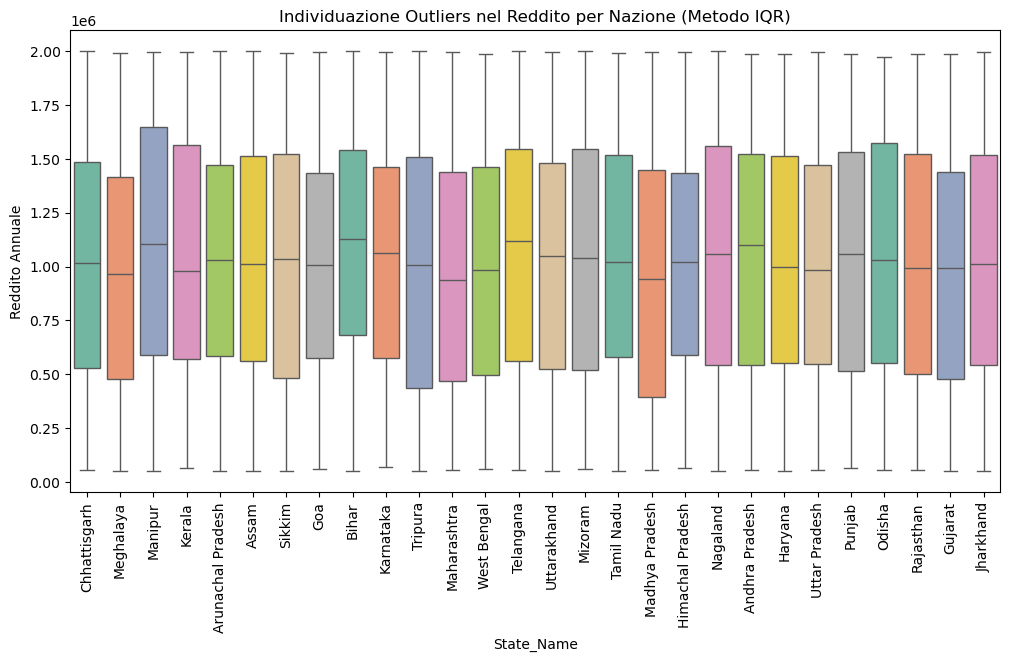

Outliers rilevati:
Empty DataFrame
Columns: [State_Name, Annual_Income]
Index: []
4919    0
8609    0
859     0
5173    0
2156    1
       ..
9911    0
5941    0
5271    0
2032    0
1613    0
Name: Healthcare_Access, Length: 8400, dtype: int64


C:\Users\Filippo\AppData\Local\Temp\ipykernel_2756\4212780405.py:328: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_healthcare_access.index, y=mean_healthcare_access.values, palette="coolwarm")


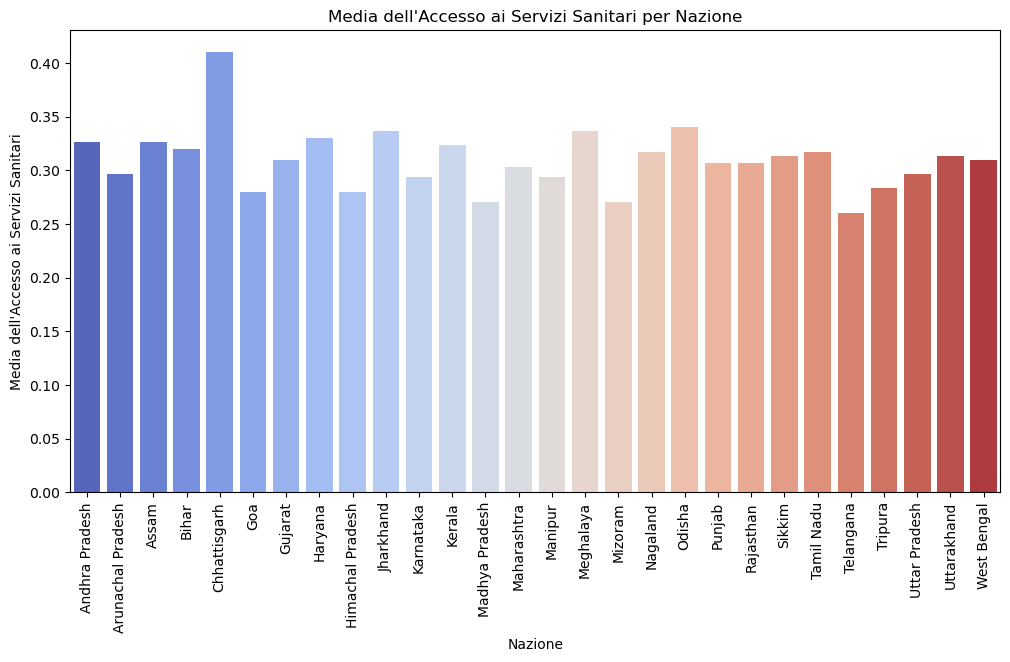

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carica il dataset (modifica il percorso del file CSV)
dataset = pd.read_csv("C:/Users/Filippo/Desktop/PROGETTI VISUALIZZAZIONE/heart_attack_prediction_india.csv")

# Mostra le prime righe del dataset per farti un'idea di come sono strutturati i dati
print(dataset.head())

# Verifica i nomi delle colonne e il tipo di dati
print(dataset.info())

# Statistiche descrittive per le colonne numeriche
print(dataset.describe())

# Seleziona solo le colonne numeriche
numeric_cols = dataset.select_dtypes(include=['int64', 'float64'])

# Calcola la matrice di correlazione solo sulle colonne numeriche
corr_matrix = numeric_cols.corr()

print(corr_matrix)

# Conta il numero di pazienti per ogni nazione
patient_count_per_state = dataset['State_Name'].value_counts()

# Stampa il numero di pazienti per nazione
print(patient_count_per_state)
#---------------------------------------------- sono di più di 300, ma non equamente divisi, prendiamo un campione significativo di 300
# Verifica se tutte le nazioni hanno almeno 300 pazienti
all_states_have_enough_patients = all(patient_count_per_state >= 300)

# Stampa il risultato
print(all_states_have_enough_patients)

# Filtro i pazienti di Mizoram
mizoram_data = dataset[dataset['State_Name'] == 'Mizoram']


# Inizializza una lista per salvare i campioni
sampled_data = []

# Per ogni nazione, estrai un campione di 300 pazienti
for state in patient_count_per_state.index:
    state_data = dataset[dataset['State_Name'] == state]
    if len(state_data) >= 300:
        sample = state_data.sample(n=300, random_state=42)
        sampled_data.append(sample)

# Unisci tutti i campioni in un unico dataframe
sampled_dataset = pd.concat(sampled_data)

# Raggruppa per nazione (State_Name) e calcola la media del rischio di attacco cardiaco per ogni nazione
mean_risk_per_state = sampled_dataset.groupby('State_Name')['Heart_Attack_Risk'].mean()
# Visualizza i risultati
print(mean_risk_per_state)

# Creiamo un grafico a barre per visualizzare il rischio medio per nazione
plt.figure(figsize=(12, 6))
mean_risk_per_state.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Average Heart Attack Risk')
plt.ylabel('State/Nation')
plt.title('Average Heart Attack Risk by State/Nation')
plt.tight_layout()
plt.show()

# Lista delle variabili da analizzare in relazione al rischio di attacco di cuore
risk_factors = ['Smoking', 'Alcohol_Consumption', 'Physical_Activity', 'Obesity', 'Diabetes',
                'Hypertension', 'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level',
                'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Stress_Level']


# Funzione per calcolare la correlazione tra il rischio di attacco di cuore e altri fattori
def calc_factor_correlation(state_data, factors):
    correlations = {}
    for factor in factors:
        correlation = state_data[factor].corr(state_data['Heart_Attack_Risk'])
        correlations[factor] = correlation
    return correlations


# Calcolare la correlazione per ogni nazione
correlation_by_state = sampled_dataset.groupby('State_Name').apply(calc_factor_correlation, factors=risk_factors)

# Convertire il risultato in un DataFrame per una visualizzazione più comoda
correlation_df = pd.DataFrame(correlation_by_state.tolist(), index=correlation_by_state.index)

# Visualizzare la correlazione per ciascun fattore per ogni nazione
print(correlation_df.head())

# Ordinare per la correlazione con il rischio di attacco cardiaco (ad esempio, per il fumo)
correlation_df_sorted = correlation_df['Smoking'].sort_values(ascending=False)  # Ad esempio, fumo

# Visualizzare le 10 nazioni con la correlazione più alta con il fumo
print("Top 10 nazioni con la correlazione più alta con il fumo:", correlation_df_sorted.head(10))

# Creare una heatmap per vedere le correlazioni di tutti i fattori di rischio con il rischio di attacco di cuore
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlazione dei fattori di rischio con il rischio di attacco di cuore per Stato")
plt.tight_layout()
plt.show()

# Verifica la correlazione per Mizoram rispetto a ciascun fattore
mizoram_correlation = correlation_df.loc['Mizoram']
print("Correlazione di Mizoram con i fattori di rischio:", mizoram_correlation)

# capiamo se Goa ha effettivamente dei trigl alti :


# Carica il dataset (modifica il percorso del file CSV)
dataset = pd.read_csv("C:/Users/Filippo/Desktop/PROGETTI VISUALIZZAZIONE/heart_attack_prediction_india.csv")

# Seleziona solo le colonne numeriche, inclusi i trigliceridi
numeric_cols = dataset.select_dtypes(include=['int64', 'float64'])

# Raggruppa per nazione (State_Name) e calcola la media dei trigliceridi per ogni nazione
# Supponiamo che la colonna "Triglycerides" esista nel tuo dataset
# (se il nome della colonna trigliceridi è diverso, dovrai adattarlo)
triglycerides_by_state = dataset.groupby('State_Name')['Triglyceride_Level'].mean()

# Conta il numero di pazienti per ogni nazione (verifica se sono almeno 300 per ogni stato)
patient_count_per_state = dataset['State_Name'].value_counts()

# Creiamo un campione di 300 soggetti per ogni nazione
sampled_data = []
for state in patient_count_per_state.index:
    state_data = dataset[dataset['State_Name'] == state]
    if len(state_data) >= 300:
        sample = state_data.sample(n=300, random_state=42)
        sampled_data.append(sample)

# Uniamo i campioni in un unico DataFrame
sampled_dataset = pd.concat(sampled_data)

# Calcoliamo la media dei trigliceridi per ogni nazione nel campione di 300 soggetti
avg_triglycerides_by_state = sampled_dataset.groupby('State_Name')['Triglyceride_Level'].mean()

# Ordiniamo le nazioni per livello medio di trigliceridi
avg_triglycerides_sorted = avg_triglycerides_by_state.sort_values(ascending=False)

# Mostriamo la tabella con i livelli medi di trigliceridi per ogni nazione
print(avg_triglycerides_sorted)

# Calcolare la media di obesità per ogni nazione
avg_obesity_by_state = sampled_dataset.groupby('State_Name')['Obesity'].mean()

# Ordinare le nazioni per livello medio di obesità, dal più alto al più basso
avg_obesity_sorted = avg_obesity_by_state.sort_values(ascending=False)

# Visualizzare i risultati
print(avg_obesity_sorted)

# Se vuoi un grafico, puoi usare un barplot per visualizzare
plt.figure(figsize=(12, 6))
avg_obesity_sorted.plot(kind='barh', color='lightcoral')
plt.xlabel('Average Obesity Level')
plt.ylabel('State/Nation')
plt.title('Average Obesity Level by State/Nation')
plt.tight_layout()
plt.show()
# Verifica il numero di soggetti per ogni nazione nel dataset campionato
patient_count_per_state_sampled = sampled_dataset.groupby('State_Name').size()

# Calcola la media dei trigliceridi per ogni stato
avg_triglycerides_by_state = sampled_dataset.groupby('State_Name')['Triglyceride_Level'].mean()

# Calcola la media del rischio di attacco di cuore per ogni stato
avg_heart_attack_risk_by_state = sampled_dataset.groupby('State_Name')['Heart_Attack_Risk'].mean()

# Calcola la media del livello di stress per ogni stato
avg_stress_by_state = sampled_dataset.groupby('State_Name')['Stress_Level'].mean()

# Verifica se Haryana ha il livello medio di trigliceridi più alto
if avg_triglycerides_by_state.idxmax() == 'Haryana':
    print("True: Haryana ha il livello medio di trigliceridi più alto")

# Verifica se Mizoram ha il livello medio di attacchi di cuore più alto
if avg_heart_attack_risk_by_state.idxmax() == 'Mizoram':
    print("True: Mizoram ha il livello medio di attacchi di cuore più alto")

# Verifica se Uttarakhand ha il livello medio di stress più alto
if avg_stress_by_state.idxmax() == 'Uttarakhand':
    print("True: Uttarakhand ha il livello medio di stress più alto")



risk_factors = [
    'Age', 'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption',
    'Physical_Activity', 'Air_Pollution_Exposure', 'Stress_Level', 'Healthcare_Access'
]

# Calcoliamo la media di ogni variabile per nazione
mean_factors_per_state = sampled_dataset.groupby('State_Name')[risk_factors].mean()

# Creiamo un DataFrame che contiene la media del rischio di attacco cardiaco e le medie delle altre variabili
correlation_data = mean_factors_per_state.copy()
correlation_data['Mean_Heart_Attack_Risk'] = mean_risk_per_state

# Calcoliamo la correlazione tra il rischio medio di attacco di cuore e gli altri fattori
correlation_matrix = correlation_data.corr()

# Selezioniamo solo la colonna relativa alla correlazione con gli attacchi di cuore
correlation_with_heart_attack = correlation_matrix['Mean_Heart_Attack_Risk'].drop('Mean_Heart_Attack_Risk')

# Ordiniamo i risultati dalla correlazione più alta alla più bassa
correlation_with_heart_attack = correlation_with_heart_attack.sort_values(ascending=False)

# Stampiamo la correlazione numerica
print(correlation_with_heart_attack)

# Grafico della correlazione
plt.figure(figsize=(10, 6))

# Usare una palette più intuitiva (blu-rosso)
sns.barplot(
    x=correlation_with_heart_attack.values,
    y=correlation_with_heart_attack.index,
    hue=correlation_with_heart_attack.index,  # Assegna i colori alle variabili
    palette="RdBu",  # Migliora la leggibilità
    legend=False
)

plt.xlabel("Correlazione con la Media di Attacchi di Cuore")
plt.ylabel("Variabili")
plt.title("Correlazione tra Fattori di Rischio e Attacchi di Cuore per Nazione")

# Linea verticale per evidenziare 0 di correlazione
plt.axvline(0, color='black', linestyle='--')

# Linea per evidenziare correlazioni forti (superiori a 0.5 o inferiori a -0.5)
plt.axvline(0.5, color='red', linestyle='--', alpha=0.5)
plt.axvline(-0.5, color='blue', linestyle='--', alpha=0.5)

plt.show()

# Calcola la media del livello di stress per ogni stato
avg_hyp_by_state = sampled_dataset.groupby('State_Name')['Hypertension'].mean()

# Verifica se Haryana ha il livello medio di trigliceridi più alto
if avg_hyp_by_state.idxmax() == 'Himachal Pradesh':
    print("True: Himachal Pradesh ha il livello medio di ipertensione più alto")
else:
    print('Non ha il livello medio di ipertensione più alto')

# Calcoliamo la media dell'ipertensione per ogni nazione
mean_hypertension_per_state = sampled_dataset.groupby('State_Name')['Hypertension'].mean()

# Troviamo la nazione con il livello medio più alto
max_hypertension_state = mean_hypertension_per_state.idxmax()
max_hypertension_value = mean_hypertension_per_state.max()

# Stampiamo il risultato
print(f"La nazione con il livello medio più alto di ipertensione è {max_hypertension_state} con un valore medio di {max_hypertension_value:.2f}")


# Selezioniamo le variabili di interesse
variables_of_interest = [
    'Physical_Activity', 'Diet_Score', 'Air_Pollution_Exposure',
    'Age', 'Annual_Income', 'Stress_Level'
]

# Creiamo la matrice di correlazione
correlation_matrix = sampled_dataset[variables_of_interest].corr()

# Visualizziamo la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice di correlazione tra variabili selezionate")
plt.show()


# Calcola la media e la deviazione standard del reddito per nazione
mean_income = sampled_dataset.groupby('State_Name')['Annual_Income'].mean()
std_income = sampled_dataset.groupby('State_Name')['Annual_Income'].std()

# Calcola lo Z-score
sampled_dataset['Income_Zscore'] = sampled_dataset.apply(
    lambda row: (row['Annual_Income'] - mean_income[row['State_Name']]) / std_income[row['State_Name']], axis=1
)

# Definiamo come outlier i valori con |Z-score| > 3
outliers = sampled_dataset[np.abs(sampled_dataset['Income_Zscore']) > 3]


# Calcoliamo Q1, Q3 e IQR per ogni nazione
Q1 = sampled_dataset.groupby('State_Name')['Annual_Income'].quantile(0.25)
Q3 = sampled_dataset.groupby('State_Name')['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1

# Definiamo i limiti per gli outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifichiamo gli outlier
sampled_dataset['Is_Outlier'] = sampled_dataset.apply(
    lambda row: row['Annual_Income'] < lower_bound[row['State_Name']] or
                row['Annual_Income'] > upper_bound[row['State_Name']], axis=1
)

# Separiamo gli outlier
outliers = sampled_dataset[sampled_dataset['Is_Outlier']]

# Boxplot per visualizzare meglio gli outlier
plt.figure(figsize=(12, 6))
sns.boxplot(x='State_Name', y='Annual_Income', data=sampled_dataset, showfliers=True, palette="Set2")
plt.xticks(rotation=90)
plt.ylabel("Reddito Annuale")
plt.title("Individuazione Outliers nel Reddito per Nazione (Metodo IQR)")

plt.show()

# Stampiamo gli outlier trovati
print("Outliers rilevati:")
print(outliers[['State_Name', 'Annual_Income']])


print(sampled_dataset['Healthcare_Access'])


# Calcoliamo la media dell'accesso ai servizi sanitari per ogni nazione
mean_healthcare_access = sampled_dataset.groupby('State_Name')['Healthcare_Access'].mean()

# Creiamo un grafico a barre per visualizzare le medie
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_healthcare_access.index, y=mean_healthcare_access.values, palette="coolwarm")
plt.xlabel("Nazione")
plt.ylabel("Media dell'Accesso ai Servizi Sanitari")
plt.title("Media dell'Accesso ai Servizi Sanitari per Nazione")
plt.xticks(rotation=90)
plt.show()

# Calcoliamo la mediana dell'accesso ai servizi sanitari per ogni nazione
median_healthcare_access = sampled_dataset.groupby('State_Name')['Healthcare_Access'].median()
